<a href="https://colab.research.google.com/github/swapnalishamrao/wine_quality_prediction/blob/main/Wine_Quality_Prediction_Analysis_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='8px'><font color='#3792cb'><u>**Wine Quality Prediction Analysis - Classification**

##### **Project Type**    - Supervised ML Classification
##### **Contribution**    - Individual
##### **Name**            - Swapnali Shamrao Mane


# **Project Summary -**

This project is dedicated to building a classification model for predicting wine quality based on a comprehensive dataset of wine attributes and quality labels. The central objective is to develop a model capable of categorizing wines into predefined quality classes, such as "excellent," "good," "average," or "poor."

The project involves rigorous data preprocessing, encompassing cleaning and feature engineering, followed by model development and evaluation. Various classification algorithms will be employed to create an accurate quality classification model.

Key success criteria include high classification accuracy, precision, recall, and F1-score. The model's interpretability is also crucial, allowing wine producers and enthusiasts to understand the factors contributing to quality categorization.

Upon completion, the project aims to provide a valuable tool for wine industry professionals, enabling them to effectively assess and classify wines, ultimately enhancing quality control and wine selection processes.

# **Problem Statement**

Develop a classification model to categorize wines into quality classes based on attributes, such as acidity and chemical composition. The goal is to provide a practical tool for wine producers and enthusiasts to assess and classify wines, improving decision-making related to wine quality and selection.

# **Let's Begin !**

# **Know Your Data**

# **Importing Library and connecting drive**

In [ ]:
## Importing necessary libraries

# For scientific computation and processing array elements.
import numpy as np
from scipy.stats import norm

# Importing pandas
import pandas as pd

# For plotting statstical visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For pretty-printing tabular data
from tabulate import tabulate

# For plotting feature importance
from sklearn.feature_selection import mutual_info_classif

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# For Split dataset into train and test
from sklearn.model_selection import train_test_split

# For Cross-Validation and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# For Scaliing dataset
from sklearn.preprocessing import MinMaxScaler

# Importing algorithams for building model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# For plotting Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# For building Artificial Neural Networks
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

!pip install shap
# For model explainability
import shap

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
df=pd.read_csv(r"/content/drive/MyDrive/winequality (1).csv")

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# **Dataset First View**

# **1. Top 5 rows of the dataset**

In [ ]:
# First Five Observations
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# **2.Display last 5 rows of the dataset**

In [ ]:
# Last five observations
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# 3.**Find the shape of our dataset**(No. of rows and columns)

In [ ]:
df.shape

(1599, 12)

In [ ]:
print("Number of Rows", df.shape[0])
print("Number of Columns", df.shape[1])

Number of Rows 1599
Number of Columns 12


# **Dataset Information**

4.Get about our dataset like total rows,columns, datatypes of each columns and memory requirement

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB



The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. Two datasets were combined and few values were randomly removed.

# **Attribute Information:**

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol
Output variable (based on sensory data):

12 - quality (score between 0 and 10) \

# **5. Check Null values in the dataset**

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# **6.Get overall Statistics About The Dataset**

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# **Bivariate Analysis**

# **7.Quality Vs, Fixed Acidity**

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt

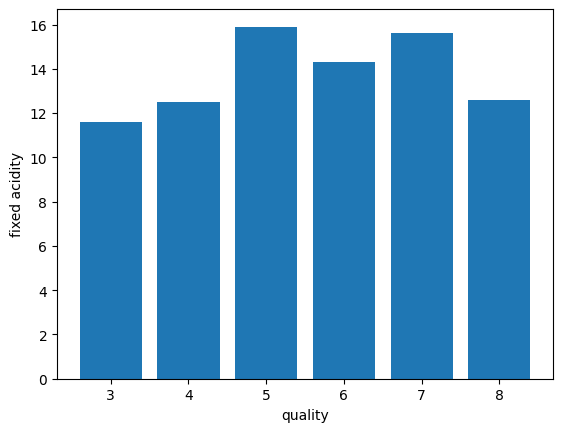

In [ ]:
plt.bar( df['quality'], df['fixed acidity'])
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.show()

As we can see from the bar plot the quality of barplot quality of wine improves as fixed acidity increases.

# **8. Volatile Acidity Vs. Quality**

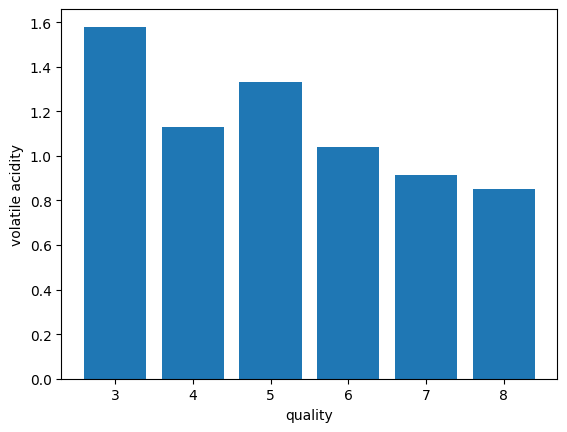

In [ ]:
plt.bar(df['quality'], df['volatile acidity'])
plt.xlabel('quality')
plt.ylabel('volatile acidity')
plt.show()

As we can see from the barplot volatile acidity is inversely proportional to acidity

# **9. Residual sugar Vs. Quality**

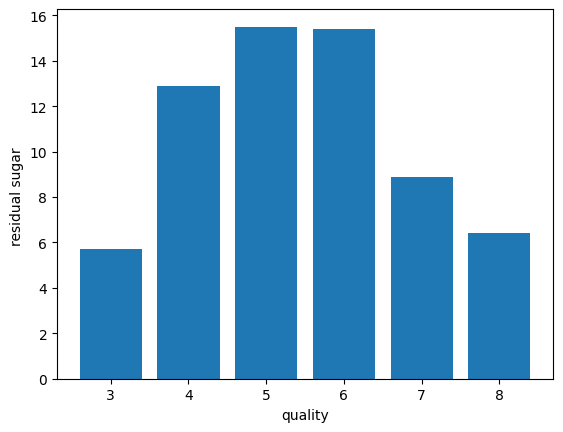

In [ ]:
plt.bar(df['quality'], df['residual sugar'])
plt.xlabel('quality')
plt.ylabel('residual sugar ')
plt.show()

As we can see from the barplot less the content of residual sugar the better quality of wine.

# **10. Chlorides Vs. Quality**

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

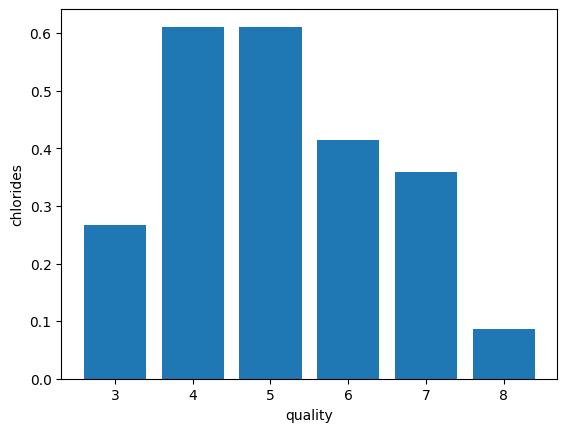

In [ ]:
plt.bar(df['quality'], df['chlorides'])
plt.xlabel('quality')
plt.ylabel('chlorides')
plt.show()

As we can see from the barplot less chorides presents better the quality of wine.

# **11.Total sulfur dioxide Vs. Quality**

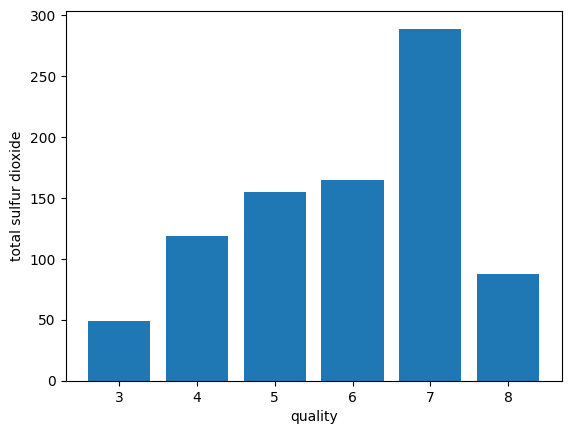

In [ ]:
plt.bar(df['quality'], df['total sulfur dioxide'])
plt.xlabel('quality')
plt.ylabel('total sulfur dioxide')
plt.show()

As we can see from the barplot do not have correlation with quality of wine.

# **12.Alcohol Vs. Quality**

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

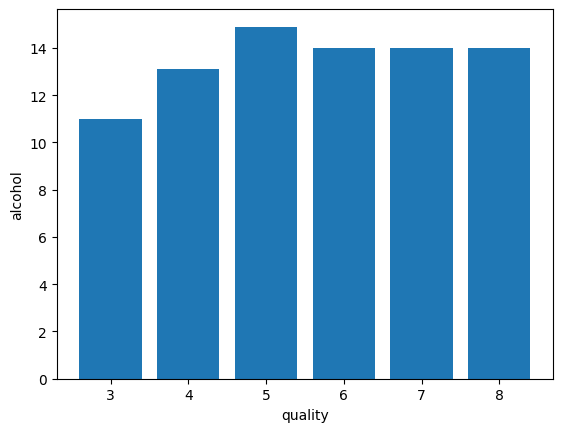

In [ ]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

As we can see from the barplot the qulity of wine increases with incrase the presence of alcohol in the wine.

# **13. Correlation Matrix**

In [ ]:
import seaborn as sns

<Axes: >

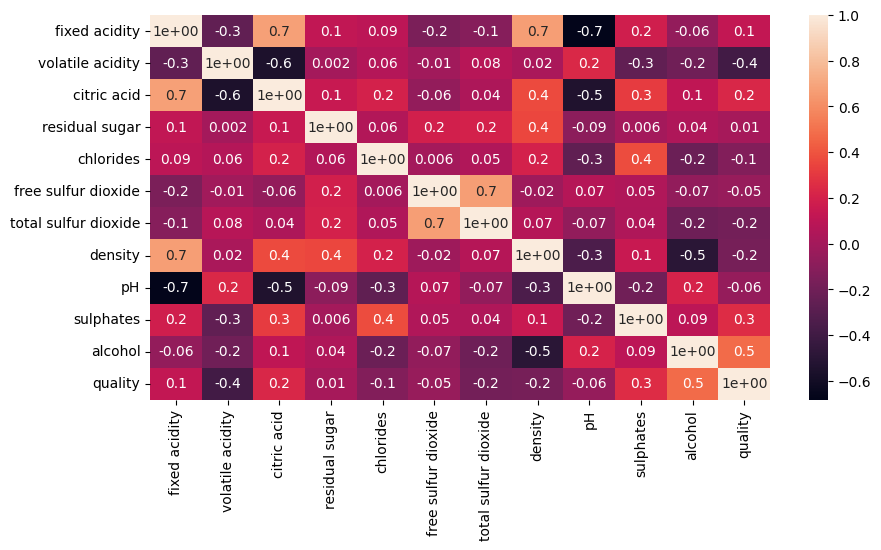

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot= True, fmt='0.1')

# **14.Binarization of target variable**

In [ ]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
df['quality'] = [1 if x>=7 else 0 for x in df['quality']]

In [ ]:
df['quality'].unique()

array([0, 1])

# **15.Store feature matrix in x and response(target) in vector y**

In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']

# **Not Handling Imbalanced**

In [ ]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [ ]:
sns.set()

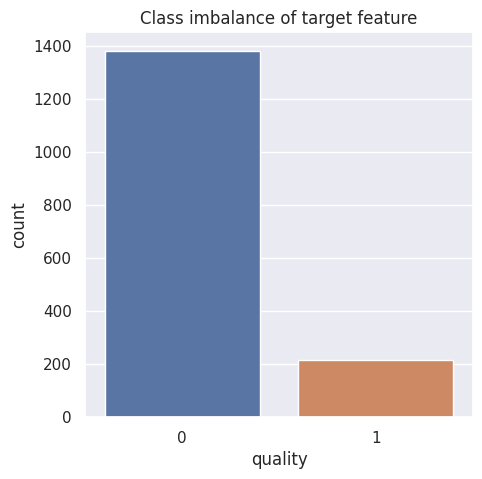

In [ ]:
# Plotting bar graph to vizualize the class imbalance of target feature
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
sns.countplot(x=df['quality'])
plt.title('Class imbalance of target feature')
plt.show()

# **16.Handling Imbalanced Dataset**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_smote, y_smote = SMOTE().fit_resample(X,y)

In [ ]:
X_smote.value_counts().sum()

2764

In [ ]:
y_smote.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

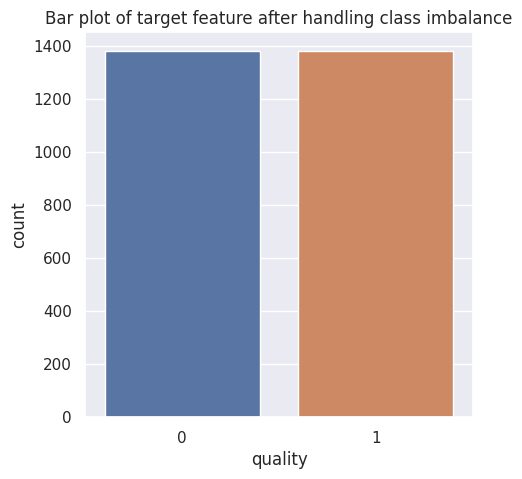

In [ ]:
# Plotting bar graph to vizualize the class imbalance of target feature
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
sns.countplot(x=y_smote)
plt.title('Bar plot of target feature after handling class imbalance')
plt.show()

# **17.Splitting the dataset into the training set and test set**

In [ ]:
# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [ ]:
# Checking shape of split
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (2211, 11)
Shape of X_test : (553, 11)
Shape of y_train : (2211,)
Shape of y_test : (553,)


In [ ]:
# Checking values of splitted dataset
X_train[0:3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2750,7.488454,0.271484,0.339670,2.291753,0.050280,4.000000,8.000000,0.995062,3.39934,0.638516,11.029689
1849,6.620384,0.386347,0.355076,2.373461,0.076658,24.265387,34.530774,0.994933,3.33777,0.776115,11.520384
651,9.800000,0.880000,0.250000,2.500000,0.104000,35.000000,155.000000,1.001000,3.41000,0.670000,11.200000


In [ ]:
# Checking values of splitted dataset
X_test[0:3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1988,8.34345,0.300277,0.466965,2.05655,0.089379,6.0,12.0,0.994236,3.273035,0.630138,12.298617
1216,7.90000,0.570000,0.310000,2.00000,0.079000,10.0,79.0,0.996770,3.290000,0.690000,9.500000
1385,8.00000,0.810000,0.250000,3.40000,0.076000,34.0,85.0,0.996680,3.190000,0.420000,9.200000


# **18. Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [ ]:
X_test

array([[-0.10328404, -1.03103627,  0.77302968, ..., -0.19239051,
        -0.44416956,  1.23835878],
       [-0.3494558 ,  0.56956021, -0.03733272, ..., -0.07823406,
        -0.06931329, -1.2263156 ],
       [-0.29394291,  1.99377133, -0.34709424, ..., -0.75112472,
        -1.76006282, -1.49051833],
       ...,
       [-0.12740424,  0.80692873, -0.08895964, ...,  0.66194567,
        -0.57027611, -0.60984258],
       [-0.79355892, -0.73596666, -0.14058656, ...,  0.7965238 ,
        -0.3197947 ,  0.09469801],
       [-1.51522649,  0.80692873, -1.06987115, ...,  1.67128166,
        -0.25717435,  0.00663044]])

In [ ]:
X_train

array([[-0.57791682, -1.20189452,  0.11584497, ...,  0.65750617,
        -0.39171087,  0.12084479],
       [-1.05980764, -0.52027762,  0.19538197, ...,  0.24320327,
         0.46994307,  0.55298755],
       [ 0.70528911,  2.40916624, -0.34709424, ...,  0.72923474,
        -0.19455399,  0.27083316],
       ...,
       [ 0.31669888,  0.7475866 , -1.63776728, ..., -0.81841378,
        -0.44503541, -0.43370743],
       [-0.18291713,  0.95528405, -1.12149807, ..., -0.07823406,
         0.30640883,  0.00663044],
       [-0.73804603,  0.86627086, -1.32800575, ...,  1.4021254 ,
        -1.00861859, -1.2263156 ]])

# **19.Applying PCA**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=0.90)

In [ ]:
X_train= pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
pca.explained_variance_ratio_

array([0.29603449, 0.18722186, 0.14177964, 0.10326148, 0.08524731,
       0.05898929, 0.04691849])

In [ ]:
sum(pca.explained_variance_ratio_)

0.919452565056881

# **20.Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1 = lg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
accuracy_score(y_test, y_pred1)

0.8173598553345389

In [ ]:
precision_score(y_test,y_pred1)

0.7747440273037542

In [ ]:
recall_score(y_test,y_pred1)

0.8664122137404581

In [ ]:
f1_score(y_test,y_pred1)

0.818018018018018

# **21.SVC**

In [ ]:
from sklearn import svm

In [ ]:
svm = svm.SVC()

In [ ]:
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred2 = svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.8716094032549728

In [ ]:
precision_score(y_test,y_pred2)

0.8193979933110368

In [ ]:
recall_score(y_test,y_pred2)

0.9351145038167938

In [ ]:
f1_score(y_test,y_pred2)

0.8734402852049912

# **22. KNeighbours Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred3 = knn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.8752260397830018

In [ ]:
precision_score(y_test,y_pred3)

0.8025078369905956

In [ ]:
recall_score(y_test,y_pred3)

0.9770992366412213

In [ ]:
f1_score(y_test,y_pred3)

0.8812392426850257

# **23.Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4 = dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred4)

0.8824593128390597

In [ ]:
precision_score(y_test,y_pred4)

0.8432055749128919

In [ ]:
recall_score(y_test,y_pred4)

0.9236641221374046

In [ ]:
f1_score(y_test,y_pred4)

0.8816029143897997

# **24.Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred5 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred5)

0.9132007233273056

In [ ]:
precision_score(y_test,y_pred5)

0.8741258741258742

In [ ]:
recall_score(y_test,y_pred5)

0.9541984732824428

In [ ]:
f1_score(y_test,y_pred5)

0.9124087591240876

# **25.Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbm = GradientBoostingClassifier()

In [ ]:
gbm.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred6 = gbm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred6)

0.8824593128390597

In [ ]:
precision_score(y_test,y_pred6)

0.8432055749128919

In [ ]:
recall_score(y_test,y_pred6)

0.9236641221374046

In [ ]:
f1_score(y_test,y_pred6)

0.8816029143897997

# **Visualize our metrics**

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_pred1 to y_pred6 are defined earlier

final_df = pd.DataFrame({
    'Models': ['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBM'],
    'ACC': [
        accuracy_score(y_test, y_pred1) * 100,
        accuracy_score(y_test, y_pred2) * 100,
        accuracy_score(y_test, y_pred3) * 100,
        accuracy_score(y_test, y_pred4) * 100,
        accuracy_score(y_test, y_pred5) * 100,
        accuracy_score(y_test, y_pred6) * 100
    ],
    'Precision': [
        precision_score(y_test, y_pred1) * 100,
        precision_score(y_test, y_pred2) * 100,
        precision_score(y_test, y_pred3) * 100,
        precision_score(y_test, y_pred4) * 100,
        precision_score(y_test, y_pred5) * 100,
        precision_score(y_test, y_pred6) * 100
    ],
    'Recall': [
        recall_score(y_test, y_pred1) * 100,
        recall_score(y_test, y_pred2) * 100,
        recall_score(y_test, y_pred3) * 100,
        recall_score(y_test, y_pred4) * 100,
        recall_score(y_test, y_pred5) * 100,
        recall_score(y_test, y_pred6) * 100
    ],
    'F1': [
        f1_score(y_test, y_pred1) * 100,
        f1_score(y_test, y_pred2) * 100,
        f1_score(y_test, y_pred3) * 100,
        f1_score(y_test, y_pred4) * 100,
        f1_score(y_test, y_pred5) * 100,
        f1_score(y_test, y_pred6) * 100
    ]
})


In [ ]:
final_df

,Models,ACC,Precision,Recall,F1
0,LR,81.735986,77.474403,86.641221,81.801802
1,SVC,87.160940,81.939799,93.511450,87.344029
2,KNN,87.522604,80.250784,97.709924,88.123924
3,DT,88.245931,84.320557,92.366412,88.160291
4,RF,91.320072,87.412587,95.419847,91.240876
5,GBM,88.245931,84.320557,92.366412,88.160291


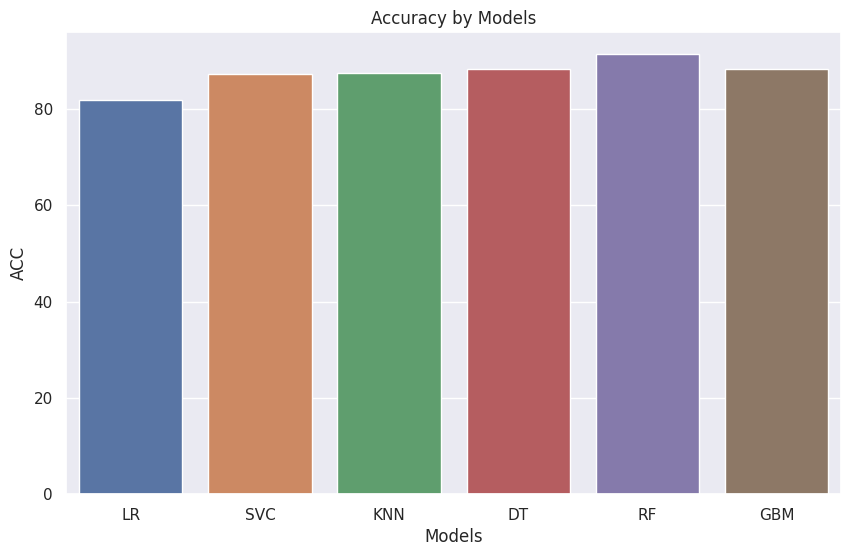

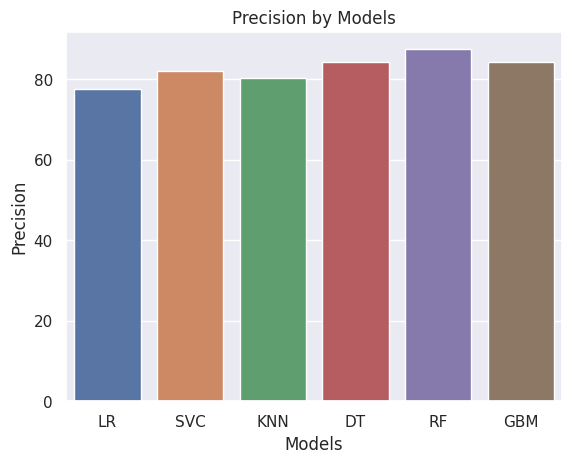

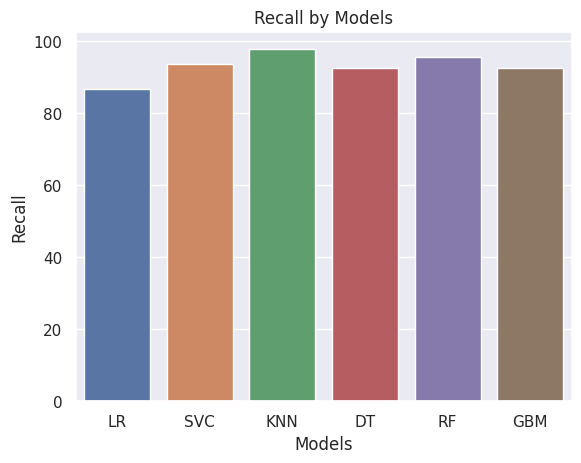

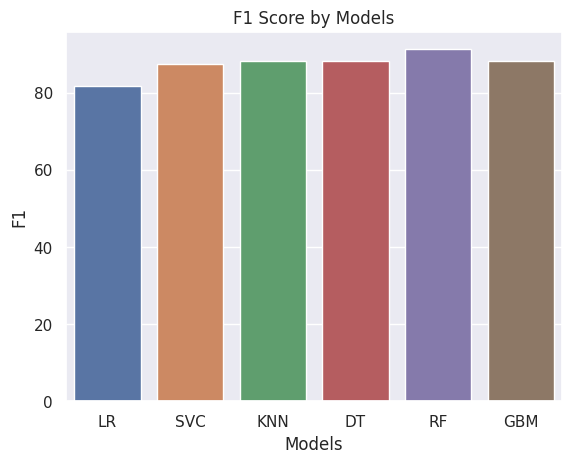

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the barplots
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

sns.barplot(x='Models', y='ACC', data=final_df)
plt.title('Accuracy by Models')
plt.show()

sns.barplot(x='Models', y='Precision', data=final_df)
plt.title('Precision by Models')
plt.show()

sns.barplot(x='Models', y='Recall', data=final_df)
plt.title('Recall by Models')
plt.show()

sns.barplot(x='Models', y='F1', data=final_df)
plt.title('F1 Score by Models')
plt.show()


# **Prediction on New Data**

In [ ]:
new_data = pd.DataFrame({
    'fixed acidity':7.3,
    'volatile acidity':0.65,
    'citric acid':0.00,
    'residual sugar':1.2,
    'chlorides':0.65,
    'free sulfur dioxide':15.0,
    'total sulfur dioxide':21.0,
    'density':-.9946,
    'pH':3.39,
    'sulphates':0.47,
     'alcohol':10.0,
},index=[0])

In [ ]:
rf= RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [ ]:
p=rf.predict(new_data)
prob=rf.predict_proba(new_data)
if p==1:
    print('wine quality is good')
else:
    print("wine quality is not good")

wine quality is not good


# **Save Model Using Joblib**

In [ ]:
import joblib

In [ ]:
joblib.dump(rf,'wine_quality_prediction')

['wine_quality_prediction']

In [ ]:
model = joblib.load('wine_quality_prediction')

In [ ]:
y_pred = model.predict(new_data)

In [ ]:
y_pred

array([0])

# **GUI**

In [ ]:
import numpy as np
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
def show_entry_feilds():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
    p9=float(e9.get())
    p10=float(e10.get())
    p11=float(e11.get())
    model = jpblib.load('wine quality prediction')
    result=model.predict(pca.transform(st.transform([[p1,p2,p3,p4,p5,p6,
                                       p7,p8,p9,p10,p11]])))

root = Tk()

e1 = Entry(root)
e2 = Entry(root)
e3 = Entry(root)
e4 = Entry(root)
e5 = Entry(root)
e6 = Entry(root)
e7 = Entry(root)
e8 = Entry(root)
e9 = Entry(root)
e10 = Entry(root)
e11 = Entry(root)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)

Button(master, text='Predict',command=show_entry_fields).grid()

mainloop()


TclError: ignored